In [5]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
fl = zipfile.ZipFile('./house-price.zip')

In [3]:
fl.extractall()

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'data_description.txt',
 'house-price.zip',
 'sample_submission.csv',
 'test.csv',
 'train.csv',
 'Untitled.ipynb']

In [8]:
train_df = pd.read_csv('./train.csv', index_col='Id')

In [9]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## EDA - Train dataset

### Cleaning

In [27]:
columns_with_null = train_df.columns[train_df.isna().sum() != 0]

Text(0, 0.5, 'No of missing value')

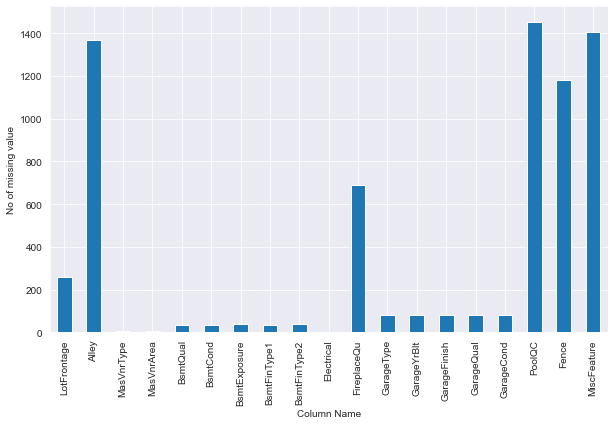

In [38]:
train_df[columns_with_null].isna().sum().plot.bar(
    figsize = (10, 6)
)
plt.xlabel('Column Name')
plt.ylabel('No of missing value')

In [45]:
permissible_missing_value = np.median(train_df[columns_with_null].isna().sum().to_numpy())

In [51]:
columns_to_drop = columns_with_null[train_df[columns_with_null].isna().sum() > permissible_missing_value]

In [53]:
train_df = train_df.drop(columns_to_drop, axis = 1)

In [54]:
numerical_col = np.array([col for col in train_df.columns if train_df[col].dtype != 'O'])
text_col      = np.array([col for col in train_df.columns if train_df[col].dtype == 'O'])

In [55]:
print(f'No of numerical features : {numerical_col.shape[0]}')
print(f'No of test      features : {text_col.shape[0]}')

No of numerical features : 36
No of test      features : 38


In [74]:
text_col_nunique = pd.Series([],dtype=pd.StringDtype())
for col in text_col:
    text_col_nunique[col] = train_df[col].nunique()
text_col_nunique.head()

MSZoning       5
Street         2
LotShape       4
LandContour    4
Utilities      2
dtype: int64

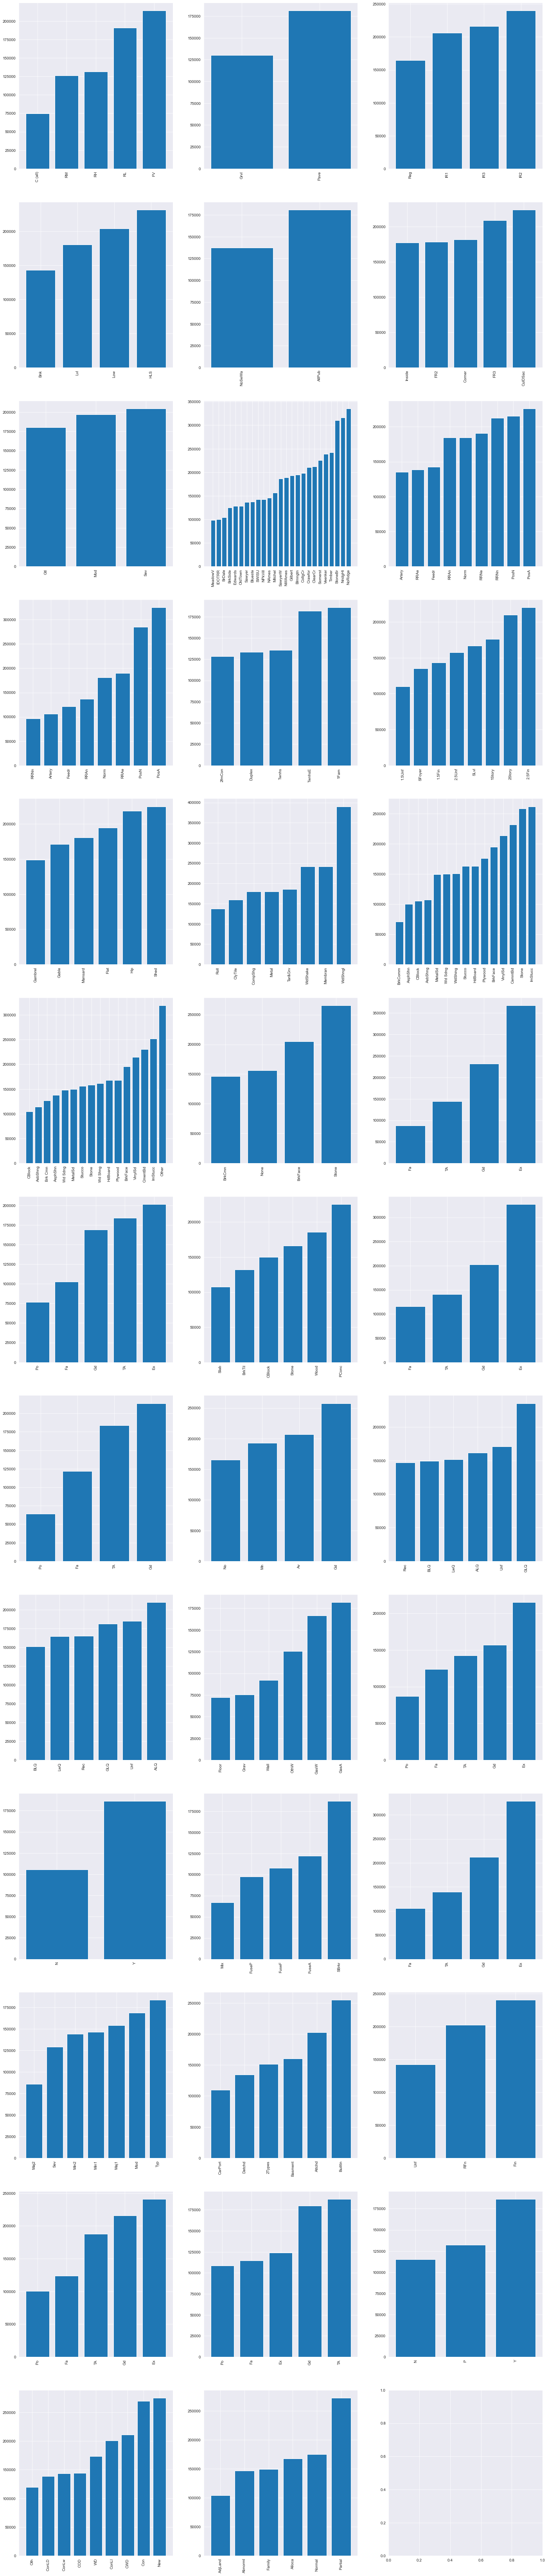

In [114]:
f, ax = plt.subplots(13,3, figsize = (24, 120))
ind = 0
for col in text_col:
    r, c = ind // 3, ind % 3
    df = train_df.groupby(col).agg({'SalePrice' : np.average}).reset_index().sort_values('SalePrice')
    ax[r][c].bar(df[col].to_numpy(), df['SalePrice'].to_numpy())
    ax[r][c].tick_params(axis='x', labelrotation = 90)
    ind += 1
    

In [96]:
text_col.shape

(38,)